In [58]:
import pandas as pd
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

SPY_data = pd.read_csv(r"C:\Users\Tajammal\Desktop\Data Sceince Projects\Yahoo 2010-15 files\SPY_2015.csv")
SPY_data["Date"] = pd.to_datetime(SPY_data["Date"])

print(SPY_data.head(10))



        Date         Open         High          Low        Close    Adj Close  \
0 2015-12-07  2090.419922  2090.419922  2066.780029  2077.070068  2077.070068   
1 2015-12-04  2051.239990  2093.840088  2051.239990  2091.689941  2091.689941   
2 2015-12-03  2080.709961  2085.000000  2042.349976  2049.620117  2049.620117   
3 2015-12-02  2101.709961  2104.270020  2077.110107  2079.510010  2079.510010   
4 2015-12-01  2082.929932  2103.370117  2082.929932  2102.629883  2102.629883   
5 2015-11-30  2090.949951  2093.810059  2080.409912  2080.409912  2080.409912   
6 2015-11-27  2088.820068  2093.290039  2084.129883  2090.110107  2090.110107   
7 2015-11-25  2089.300049  2093.000000  2086.300049  2088.870117  2088.870117   
8 2015-11-24  2084.419922  2094.120117  2070.290039  2089.139893  2089.139893   
9 2015-11-23  2089.409912  2095.610107  2081.389893  2086.590088  2086.590088   

       Volume  
0  4043820000  
1  4214910000  
2  4306490000  
3  3950640000  
4  3712120000  
5  424503000

In [59]:
#set date as index
SPY_data.set_index('Date', inplace=True)
#Reverse the order of the dataframe in order to have oldest values at top
SPY_data.sort_values('Date', ascending=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000


In [60]:
#Take the name of the columns of the SPY-Dta to see if null values exist
variables= SPY_data.columns
SPY_data.isnull().sum().loc[variables]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

C:\Users\Tajammal\AppData\Local\Temp\ipykernel_18636\3589538752.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df["Adj Close"], df[var], c=next(colors))


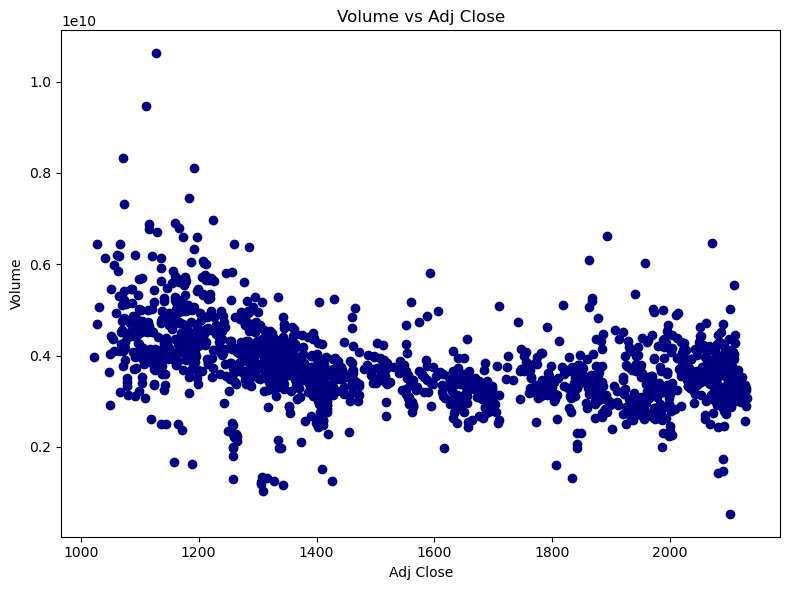

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def correlation(df, variables, n_rows, n_cols):
    jet = plt.get_cmap('jet')
    colors = iter(jet(np.linspace(0, 1, len(variables))))  # reset colors each call
    
    fig = plt.figure(figsize=(8,6))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        ax.scatter(df["Adj Close"], df[var], c=next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel(var)
        ax.set_title(f"{var} vs Adj Close")
    fig.tight_layout()
    plt.show()

# #Is there any correlation between Volumn and Adj Close Price?
# Example: check correlation between Volume and Adj Close
variables = SPY_data.columns[-1:]
correlation(SPY_data, variables, 1, 1)

C:\Users\Tajammal\AppData\Local\Temp\ipykernel_18636\3589538752.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df["Adj Close"], df[var], c=next(colors))


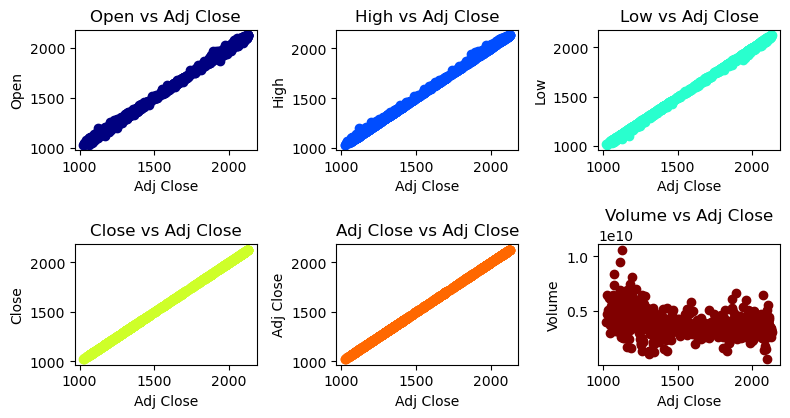

In [62]:
#is ther any correlation between Open, High, Low, close and Adj close price?
variables= SPY_data.columns[0:12]
correlation(SPY_data, variables, 3,3)

In [63]:
SPY_data.corr()['Adj Close'].loc[variables]

Open         0.999187
High         0.999637
Low          0.999702
Close        1.000000
Adj Close    1.000000
Volume      -0.408814
Name: Adj Close, dtype: float64

C:\Users\Tajammal\AppData\Local\Temp\ipykernel_18636\3589538752.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df["Adj Close"], df[var], c=next(colors))


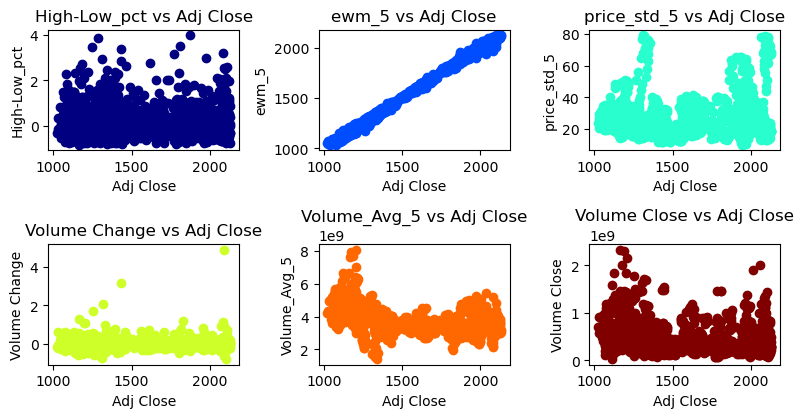

In [64]:
#1. High and Low price percentage change
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()

#2. ewm    price in tthe last 5 days
SPY_data['ewm_5'] = SPY_data['Close'].ewm(span=5).mean().shift(periods=1)

#3. STD price in the last 5 days
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False, window=30).std().shift(periods=1)

#4. Quantity Percentage of Volume change on daily basis
SPY_data['Volume Change'] = SPY_data['Volume'].pct_change()

#5. Average quantity of volume in last 5 days
SPY_data['Volume_Avg_5'] = SPY_data['Volume'].rolling(center=False, window=5).mean().shift(periods=1)

#6. STD of volume quantity on daily basis
SPY_data['Volume Close'] = SPY_data['Volume'].rolling(center=False, window=5).std().shift(periods=1)

#In order to move froward, let see the correlation of these new variables and Adj Close Price

jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0, 1, 10)))  # reset colors each call
#Take the name of the last 6 columns of the SPY_data  which are the model features

variables = SPY_data.columns[-6:]
correlation(SPY_data, variables, 3,3)


In [65]:
SPY_data.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
Volume Change   -0.005446
Volume_Avg_5    -0.485734
Volume Close    -0.241898
Name: Adj Close, dtype: float64

In [66]:
SPY_data.isnull().sum().loc[variables]

High-Low_pct      1
ewm_5             1
price_std_5      30
Volume Change     1
Volume_Avg_5      5
Volume Close      5
dtype: int64

In [67]:
# To train a model, it is necessary to drop missing values.
SPY_data = SPY_data.dropna(axis=0)

#Generate the train and test sets
train = SPY_data[SPY_data.index < datetime(2015, month=1, day=1)]
test = SPY_data[SPY_data.index >= datetime(2015, month=1, day=1)]
dates= test.index

In [1]:
# Regression Algorithm to Predict Adj Close Price
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
X_train = train[['High-Low_pct', 'ewm_5', 'price_std_5', 'Volume Change', 'Volume_Avg_5', 'Volume Close']]
y_train = train['Adj Close']
lr.fit(X_train, y_train)

ModuleNotFoundError: No module named 'sklearn'